In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install librosa

Load the data

In [ ]:
import librosa
import time
import os
path = '/content/drive/MyDrive/DATA SET/'
lst = []

start_time = time.time()

for subdir, dirs, files in os.walk(path):
  for file in files:
      try:
        #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
        X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
        # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
        # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
        file = int(file[7:8]) - 1 
        arr = mfccs, file
        lst.append(arr)
      # If the file is not valid, skip it
      except ValueError:
        continue

print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

--- Data loaded. Loading time: 1951.8793835639954 seconds ---


In [ ]:
# Creating X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)

In [ ]:
import numpy as np
X = np.asarray(X) #asarray is used to convert my input into array
y = np.asarray(y)


X.shape, y.shape

((3075, 40), (3075,))

In [ ]:
# Saving joblib files to not load them again with the loop above

import joblib

X_name = 'X.joblib'
y_name = 'y.joblib'
save_dir = '/content/drive/MyDrive/DATA SET/'

savedX = joblib.dump(X, os.path.join(save_dir, X_name))
savedy = joblib.dump(y, os.path.join(save_dir, y_name))

In [ ]:
# Loading saved models
import joblib
X = joblib.load('/content/drive/MyDrive/DATA SET/X.joblib')
y = joblib.load('/content/drive/MyDrive/DATA SET/y.joblib')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(2060, 40)

# MLP Classifier

In [ ]:

#import soundfile
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, train_size= 0.75,random_state=9)

Initialize MLP Classifier

In [ ]:
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

Train the model

In [ ]:
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Predict the accuracy of our model

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       1.00      0.82      0.90        11
           2       0.92      0.63      0.75        19
           3       0.60      0.90      0.72        10
           4       0.59      0.91      0.71        11
           5       0.78      0.70      0.74        10
           6       0.62      0.42      0.50        12
           7       0.79      1.00      0.88        15

    accuracy                           0.74        93
   macro avg       0.75      0.72      0.71        93
weighted avg       0.77      0.74      0.73        93



In [ ]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 74.19%


# SVM Classifier

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC


#splitting dataset into train/ test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()),
        ('SVM', SVC())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Fit the pipeline to the training set: svc_scaled
svc_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a classifier to the unscaled data
svc_unscaled = SVC(kernel = 'linear').fit(X_train, y_train)

# Compute and print metrics
print('Accuracy: {}'.format(svc_scaled.score(X_test, y_test)))
#print('Accuracy without Scaling: {}'.format(svc_unscaled.score(X_test, y_test)))

Accuracy: 0.816260162601626


In [ ]:
scaled_predictions = svc_scaled.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.57      0.64        46
           1       0.77      0.93      0.84        92
           2       0.85      0.82      0.83        83
           3       0.81      0.71      0.76        72
           4       0.90      0.87      0.88        79
           5       0.80      0.82      0.81        82
           6       0.85      0.82      0.84        80
           7       0.80      0.85      0.83        81

    accuracy                           0.82       615
   macro avg       0.81      0.80      0.80       615
weighted avg       0.82      0.82      0.81       615

----accuracy score 81.6260162601626 ----


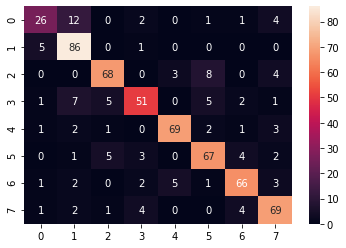

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,scaled_predictions))

acc = float(accuracy_score(y_test,scaled_predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,scaled_predictions)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

# CNN


In [ ]:
import numpy as np
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
x_traincnn.shape, x_testcnn.shape

((2060, 40, 1), (1015, 40, 1))

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.utils.np_utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(64, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(4)))
model.add(Conv1D(256, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=1e-07, decay=0.0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 40, 64)            384       
_________________________________________________________________
activation_8 (Activation)    (None, 40, 64)            0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 40, 64)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 10, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 10, 128)           41088     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 128)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 128)          

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:

cnnhistory=model.fit(x_traincnn, y_train, batch_size=18, epochs=500, validation_data=(x_testcnn, y_test))

Epoch 1/500
115/115 [==============================] - 19s 23ms/step - loss: 6.3909 - accuracy: 0.1278 - val_loss: 2.4456 - val_accuracy: 0.1291
Epoch 2/500
115/115 [==============================] - 2s 17ms/step - loss: 4.5838 - accuracy: 0.1421 - val_loss: 2.0704 - val_accuracy: 0.1635
Epoch 3/500
115/115 [==============================] - 2s 17ms/step - loss: 3.5449 - accuracy: 0.1612 - val_loss: 1.9764 - val_accuracy: 0.2315
Epoch 4/500
115/115 [==============================] - 2s 17ms/step - loss: 3.0539 - accuracy: 0.1822 - val_loss: 2.0286 - val_accuracy: 0.1872
Epoch 5/500
115/115 [==============================] - 2s 17ms/step - loss: 2.5716 - accuracy: 0.1783 - val_loss: 2.1717 - val_accuracy: 0.1340
Epoch 6/500
115/115 [==============================] - 2s 17ms/step - loss: 2.4236 - accuracy: 0.1957 - val_loss: 1.9388 - val_accuracy: 0.2177
Epoch 7/500
115/115 [==============================] - 2s 17ms/step - loss: 2.2877 - accuracy: 0.1842 - val_loss: 1.8895 - val_accuracy

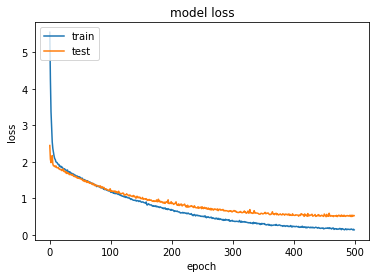

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

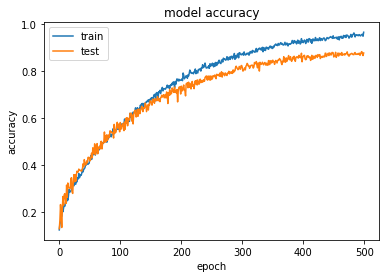

In [ ]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict_classes(x_testcnn)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions

array([7, 6, 2, ..., 7, 5, 7])

In [ ]:
y_test

array([7, 6, 2, ..., 7, 5, 7])

In [ ]:
new_Ytest = y_test.astype(int)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(new_Ytest, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        80
           1       0.85      0.95      0.90       149
           2       0.87      0.86      0.87       143
           3       0.90      0.77      0.83       126
           4       0.91      0.89      0.90       134
           5       0.87      0.87      0.87       134
           6       0.85      0.93      0.89       119
           7       0.97      0.87      0.91       130

    accuracy                           0.88      1015
   macro avg       0.88      0.87      0.87      1015
weighted avg       0.88      0.88      0.88      1015



In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(new_Ytest, predictions)
print (matrix)

# 0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised

[[ 67   8   0   3   0   0   2   0]
 [  7 142   0   0   0   0   0   0]
 [  2   2 123   0   4   8   2   2]
 [  7   9   5  97   0   4   2   2]
 [  0   3   4   0 119   0   8   0]
 [  0   0   5   6   2 117   4   0]
 [  0   2   0   0   2   4 111   0]
 [  1   2   4   2   4   2   2 113]]


In [ ]:

model.save('testing10_model.h5')
print("MODEL SAVED")

MODEL SAVED


In [ ]:
#import pickle
#pickle.dump(model, open("model.model", "wb"))

In [ ]:
loss, acc = model.evaluate(x_testcnn, y_test)
print(" model, accuracy: {:5.2f}%".format(100*acc))

32/32 [==============================] - 0s 3ms/step - loss: 0.5250 - accuracy: 0.8759
 model, accuracy: 87.59%
